# Time Serie Regression Analysis

In this toy study a Ordinary Regression Analysis will be performed over weather station data and reanalysis data. The reanalysis dataset comes from NOAA-NCEP data and observational data are from available datasets from Instituto Brasileiro de Meteorologia INMET.

Among other applications, Regression Analysis figures as an importat tool to test linear relationships between two variables which are expected to represent the same values. In this case it will be applied to test if model simulated data in the reanalysis process representes, in a acceptable manner the observed data in a geographical point. The geograpical point is over Brazilian Northeast region. 

Normally Regression Analysis are composed by three stepes: the regression per si, error analysis and hipotesys tests. For this, the Python Skylearn  Kit figured as the best option for this study.


## Dataset and Extreme Indices

An widespread way to analyse climate data is to work with Extremes Indices. They are padronized index defined by the ETCCDI team and had been largely adopted by scientific comunity. 

Here, the TXn index will be studied. It is defined as the minimum maximum temperature in a given time period. Here we will analyse monthly temperature values. 

Given the maximum daily recorded temperature time series from observational data and reanalysis, lets compute the monthly TNx indices. The time series starts in 1996 until 2016.

In [1]:
import pandas as pd
path = '/media/desplein/store/projetoMeteo/data_bases/'
ini = '1996-01-01'
end = '2016-11-30'
locations = ['BARBALHA']

stations = pd.read_csv(path + 'station_tmax_BARBALHA.csv', index_col=0, parse_dates=True)
reanalysis = pd.read_csv(path + 'noaa_reanalysis_tmax_BARBALHA.csv', index_col=0, parse_dates=True)


Taking a look in the data loaded

In [2]:
stations.head()

,BARBALHA
1996-01-01,33.2
1996-01-02,34.4
1996-01-03,34.3
1996-01-04,33.9
1996-01-05,34.9


In [18]:
stations.summary()

AttributeError: 'DataFrame' object has no attribute 'summary'

In [3]:
reanalysis.head()

,BARBALHA
1996-01-01,26.250031
1996-01-02,25.050018
1996-01-03,26.850006
1996-01-04,26.250031
1996-01-05,26.750031


Now, we must to reframe the original daily data resampling daily data to monthly and geting minimum monthly value

In [17]:
# Reframing daily data to monthly frequency and get its minimums

TXn_station = stations.resample('m').min()
TXn_reanalysis = reanalysis.resample('m').min()

In [7]:
TXn_station.head()

,BARBALHA
1996-01-31,25.3
1996-02-29,26.9
1996-03-31,28.0
1996-04-30,28.1
1996-05-31,26.6


In [8]:
TXn_reanalysis.head()

,BARBALHA
1996-01-31,24.149994
1996-02-29,23.950012
1996-03-31,24.050018
1996-04-30,23.649994
1996-05-31,24.350006


Now, from computed indices it is possible to plot the time series for all the avalable period

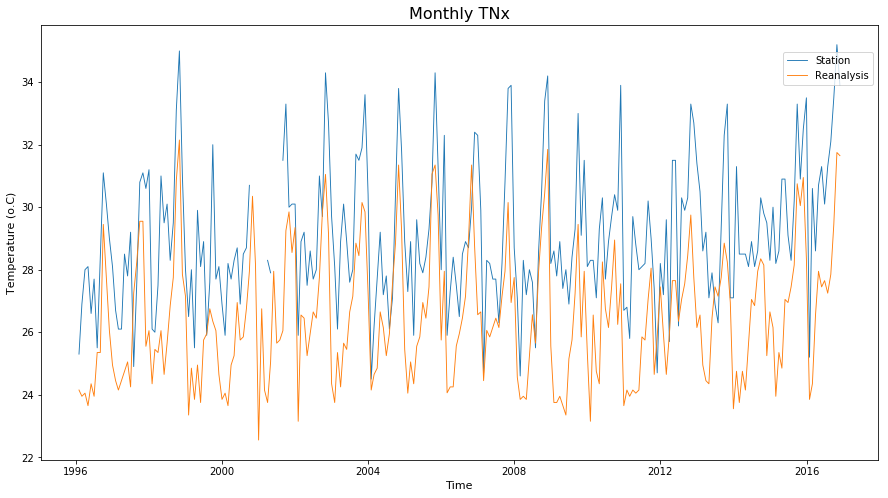

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(TXn_station, label = 'Station', linewidth=0.9)
plt.plot(TXn_reanalysis, label = 'Reanalysis', linewidth=0.9)

plt.ylabel("Temperature (o.C)", fontsize=11)
plt.xlabel("Time", fontsize=11)
plt.title('Monthly TNx', fontsize=16)
plt.legend(bbox_to_anchor=[1, 0.9], loc='right')

plt.grid(False)
plt.show()


## Ordinary Least Squares

In [98]:
from statsmodels.formula.api import ols

# Adjusting data
data = pd.concat([a,b], axis=1).dropna().values
data = DataFrame(dict(x = data[:,0], y = data[:,1]))
model = ols("y ~ x", data).fit()

In [100]:
 model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     260.8
Date:                Fri, 09 Jun 2017   Prob (F-statistic):           2.92e-40
Time:                        18:10:18   Log-Likelihood:                -430.86
No. Observations:                 243   AIC:                             865.7
Df Residuals:                     241   BIC:                             872.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1765      1.197      5.994      0.000       4.818       9.535
x              0.6631      0.041     16.151      0.000       0.582       0.744
==============================================================================
Omnibus:                        2.618   Durbin-Watson:                   1.231
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.999
Skew:                           0.044   Prob(JB):                        0.368
Kurtosis:                       2.565   Cond. No.                         381.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finally, ploting the fitted rule and data

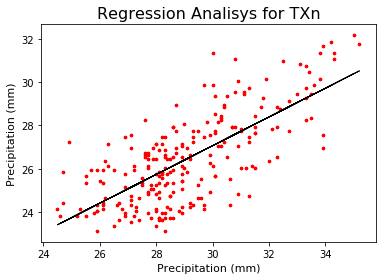

In [103]:
plt.scatter(a, b,  color='red', s=6)
plt.plot(data['x'], model.predict(), color='black',  linewidth=0.8)
name = 'Monthly TNx'
labelName = 'T (o.C)'
labelName = 'Precipitation (mm)'
plt.title("Regression Analisys for TXn" , fontsize=16)
plt.ylabel(labelName, fontsize=11)
plt.xlabel(labelName, fontsize=11)
plt.show()
